In [5]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# import dataset called "mnist" consists of 70.000 grayscale images in 10 categories
#Each image is 28x28 pixels
fashion_mnist= tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [10]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Angle boot']

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(train_labels)

60000

In [15]:
len(test_labels)

10000

In [16]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

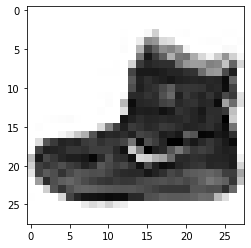

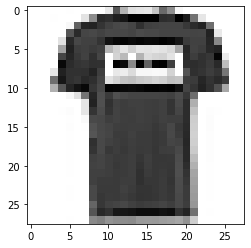

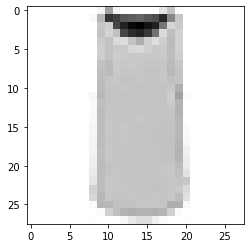

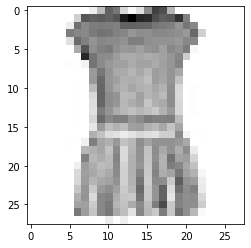

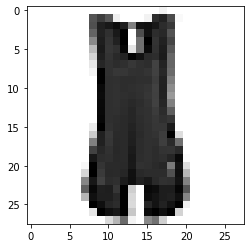

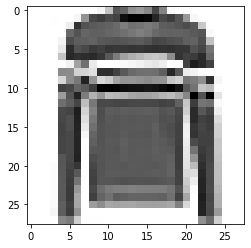

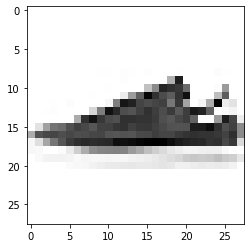

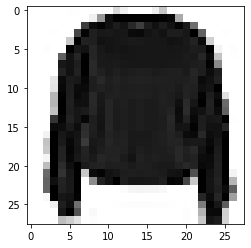

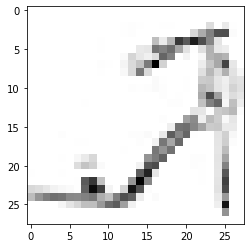

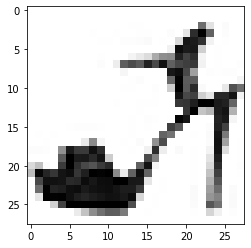

In [19]:
for i in range(10):
    plt.imshow(train_images[i], cmap="Greys")
    plt.show()

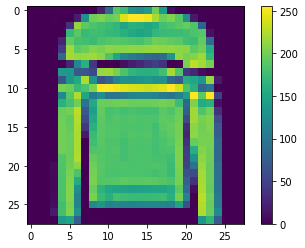

In [20]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()


In [21]:
train_images= train_images / 255.0

test_images= test_images / 255.0

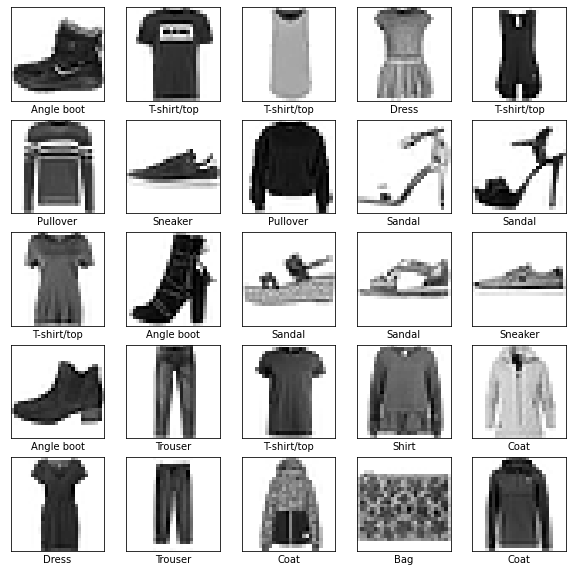

In [22]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [26]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [29]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2334 - accuracy: 0.9132
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2240 - accuracy: 0.9159
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2188 - accuracy: 0.9179
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2118 - accuracy: 0.9211
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2058 - accuracy: 0.9221
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1973 - accuracy: 0.9266
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1940 - accuracy: 0.9273
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1913 - accuracy: 0.9288
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1849 - accuracy: 0.9309
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.181

In [31]:

test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3620 - accuracy: 0.8829

Test accuracy:  0.8828999996185303


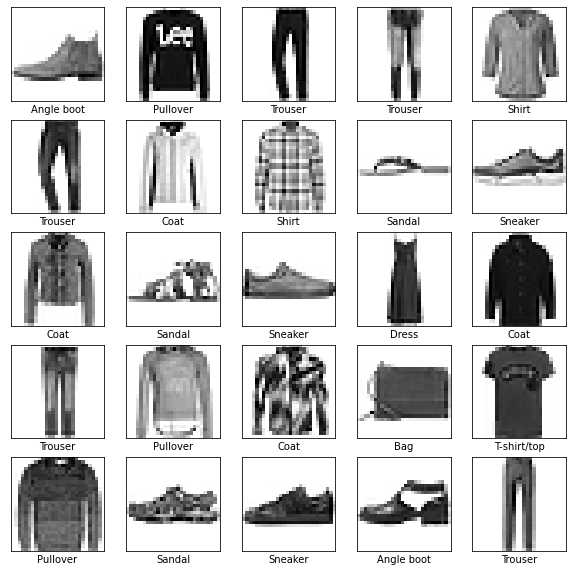

In [33]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [34]:
probability_model=tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])
                

In [35]:
predications=probability_model.predict(test_images)


In [36]:
predications[0]

array([1.2301937e-13, 1.7288658e-13, 9.0656952e-13, 1.4335909e-14,
       6.8421956e-16, 1.4845257e-05, 3.8708139e-14, 3.1176952e-03,
       1.5464928e-11, 9.9686748e-01], dtype=float32)

In [37]:
np.argmax(predications[0])

9

In [38]:
test_labels[0]

9

In [ ]:
def plot_image(i, predications_array, true_label, img):
    true_labels, img= true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label= np.argmax(predications_array)
    if predicted_label == true_label:
        color= 'blue'
    else:
        color='red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                    100*np.max(predications_array),
                    class_names[true_label]),
                    color=color)


def plot_value_array(i, predications_array, true_label):
    true_label= true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10), predications_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label=np.argmax(predications_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


In [ ]:
num_rows=5
num_cols=3
num_images= num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predications[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predications[i], test_labels)
plt.tight_layout()
plt.show()